In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report


In [74]:
csv_file_path = './weather_data.csv'
df=pd.read_csv(csv_file_path)

## Data Preprocessing

In [75]:
unique_values = df['rain_or_not'].unique()
unique_values

array(['Rain', 'No Rain'], dtype=object)

In [76]:

df['rain_or_not']=df['rain_or_not'].replace({"Rain":1,"No Rain":0})

C:\Users\Verosha Kriyanjala\AppData\Local\Temp\ipykernel_13868\3404451146.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['rain_or_not']=df['rain_or_not'].replace({"Rain":1,"No Rain":0})


In [77]:
empty_values_per_column=df.isna().sum()
empty_values_per_column

date                0
avg_temperature    15
humidity           15
avg_wind_speed     15
rain_or_not         0
cloud_cover        15
pressure            0
dtype: int64

In [78]:
df.count()

date               311
avg_temperature    296
humidity           296
avg_wind_speed     296
rain_or_not        311
cloud_cover        296
pressure           311
dtype: int64

In [79]:
df=df.dropna()
df.count()

date               296
avg_temperature    296
humidity           296
avg_wind_speed     296
rain_or_not        296
cloud_cover        296
pressure           296
dtype: int64

In [80]:
top_max_pressures = df['avg_wind_speed'].nlargest(1)
top_max_pressures

60    56.636041
Name: avg_wind_speed, dtype: float64

In [81]:
data = df['avg_wind_speed']
df1 = pd.DataFrame(data)

max_index = df1['avg_wind_speed'].idxmax()

mean_wind_speed = df1.loc[df.index != max_index, 'avg_wind_speed'].mean()

df.loc[max_index, 'avg_wind_speed'] = mean_wind_speed

print(df)

           date  avg_temperature   humidity  avg_wind_speed  rain_or_not  \
0    2023-01-01        23.745401  46.140905        7.845981            1   
1    2023-01-02        30.030503  59.876587        5.382457            1   
2    2023-01-03        28.365224  51.464618       13.158008            1   
3    2023-01-04        27.550929  53.103799        5.886677            1   
4    2023-01-05        23.639303  57.826186       12.248992            1   
..          ...              ...        ...             ...          ...   
306  2023-11-03        22.072834  37.756910        4.729355            0   
307  2023-11-04        19.645885  42.190604        8.092369            0   
308  2023-11-05        23.884496  36.205508       11.860847            1   
309  2023-11-06        18.168418  34.785000        4.781288            0   
310  2023-11-07        19.389714  37.717416        9.388371            0   

     cloud_cover     pressure  
0      20.851051   992.965681  
1      93.059521  1037.

In [82]:
df["date"] = pd.to_datetime(df["date"]) 
df["month"] = df["date"].dt.month 
df["day"] = df["date"].dt.day

In [83]:
df=df.drop(columns=["date"])

## Graphs

### Each column alog time series

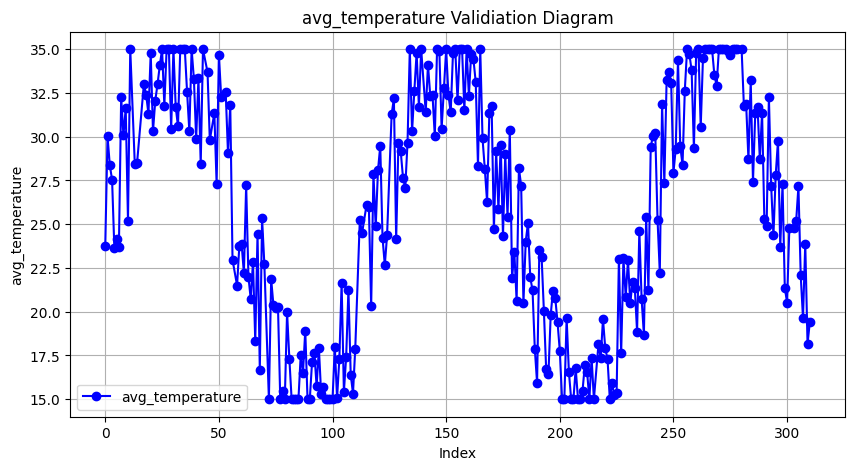

In [84]:
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['avg_temperature'], marker='o', linestyle='-', color='b', label='avg_temperature')

plt.xlabel('Index')
plt.ylabel('avg_temperature')
plt.title('avg_temperature Validiation Diagram')
plt.legend()
plt.grid(True)

plt.show()

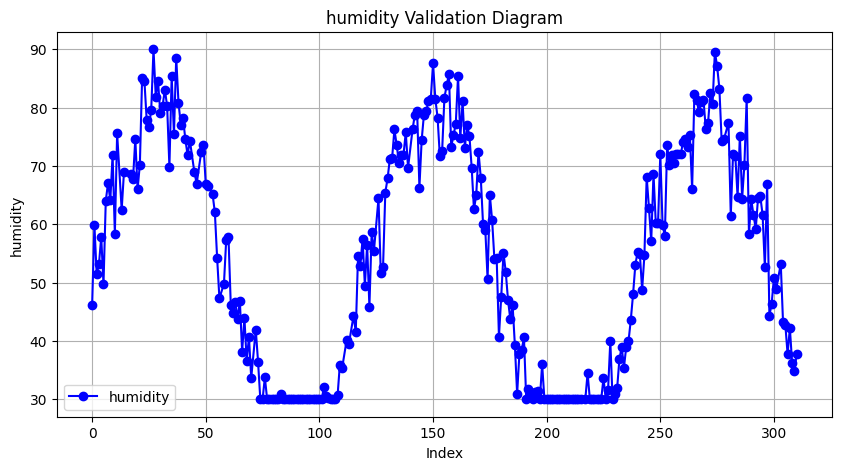

In [85]:
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['humidity'], marker='o', linestyle='-', color='b', label='humidity')

# Add labels and title
plt.xlabel('Index')
plt.ylabel('humidity')
plt.title('humidity Validation Diagram')
plt.legend()
plt.grid(True)

# Show plot
plt.show()

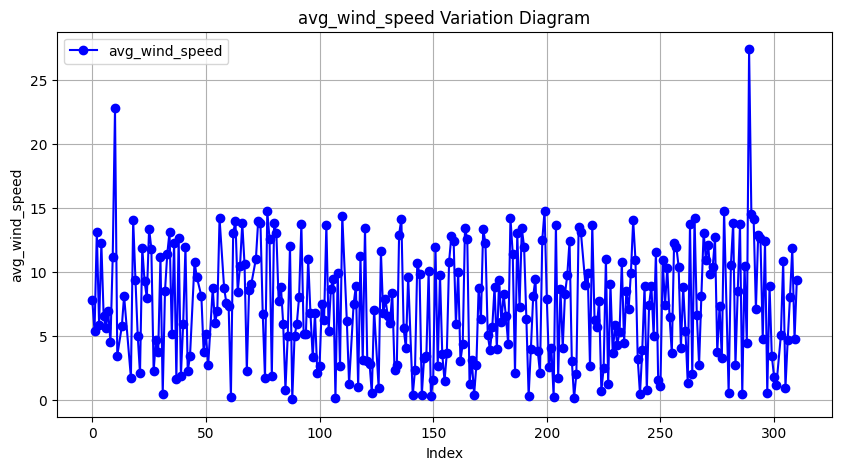

In [86]:
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['avg_wind_speed'], marker='o', linestyle='-', color='b', label='avg_wind_speed')

# Add labels and title
plt.xlabel('Index')
plt.ylabel('avg_wind_speed')
plt.title('avg_wind_speed Variation Diagram')
plt.legend()
plt.grid(True)

# Show plot
plt.show()

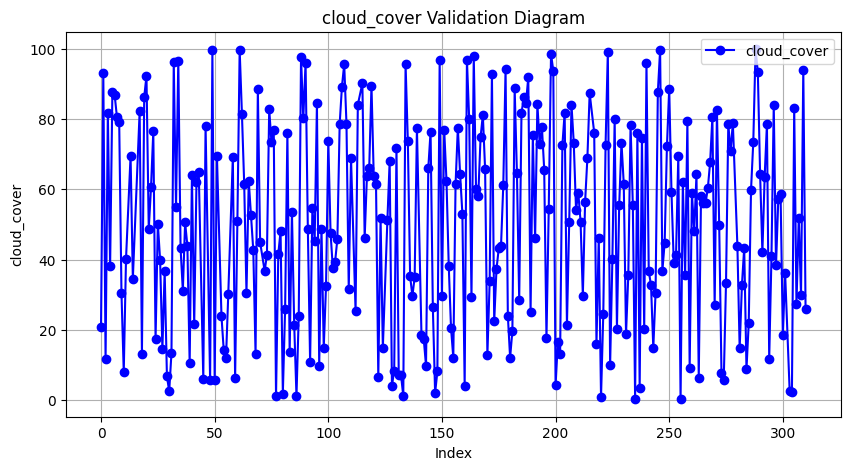

In [87]:
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['cloud_cover'], marker='o', linestyle='-', color='b', label='cloud_cover')

# Add labels and title
plt.xlabel('Index')
plt.ylabel('cloud_cover')
plt.title('cloud_cover Validation Diagram')
plt.legend()
plt.grid(True)

# Show plot
plt.show()

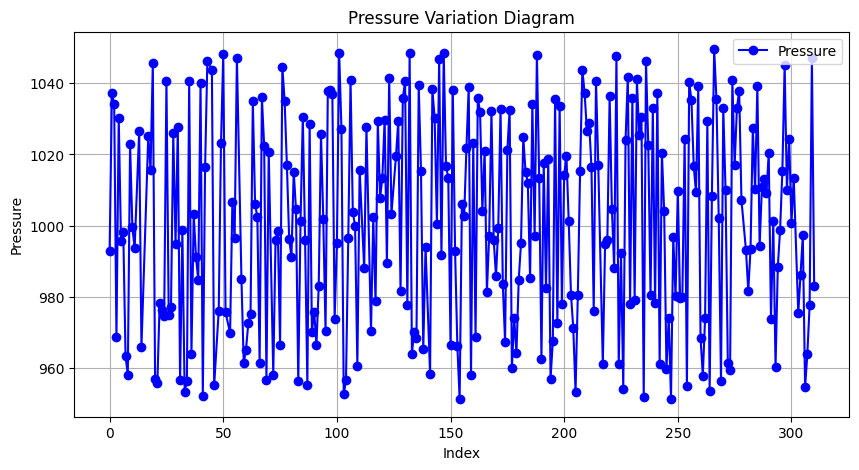

In [88]:

plt.figure(figsize=(10, 5))
plt.plot(df.index, df['pressure'], marker='o', linestyle='-', color='b', label='Pressure')

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Pressure')
plt.title('Pressure Variation Diagram')
plt.legend()
plt.grid(True)

plt.show()

### Correlation Analysis
Find relationships between variables

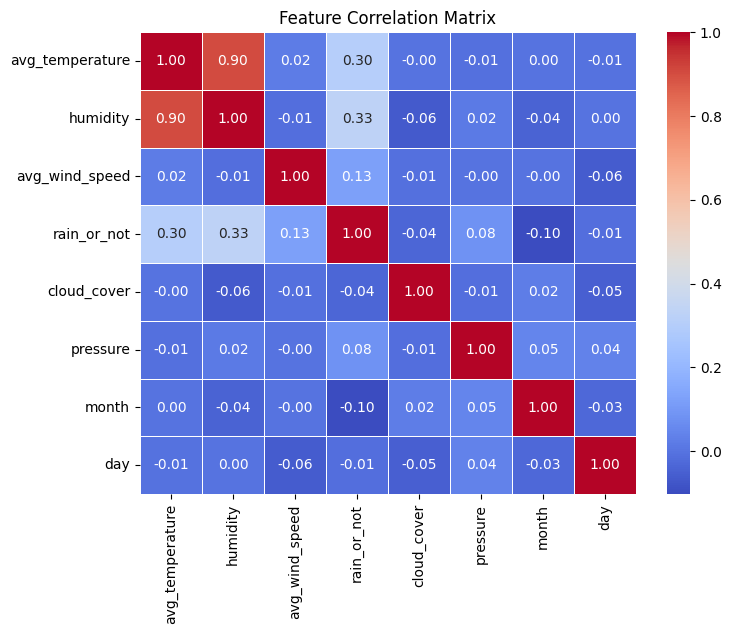

In [89]:
corr_matrix = df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()


### Univariate Analysis (Feature Distributions)

#### Histograms
Check distributions of numerical features

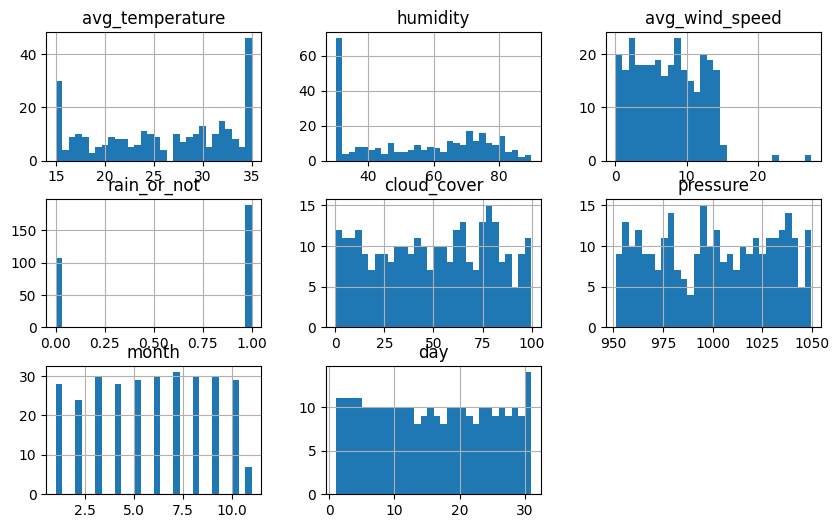

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms
df.hist(figsize=(10, 6), bins=30)
plt.show()


#### Boxplots
Detect outliers

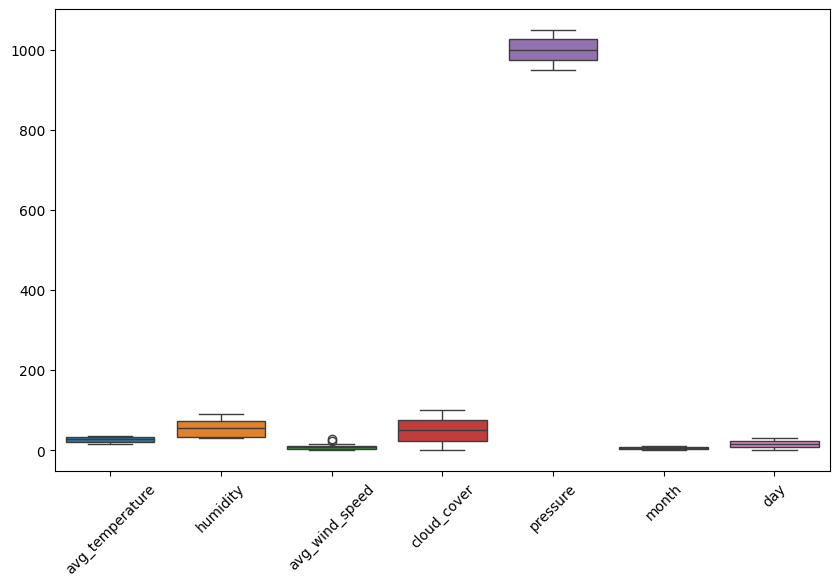

In [91]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.drop(columns=["rain_or_not"]))
plt.xticks(rotation=45)
plt.show()

### Bivariate Analysis (Feature vs Target Relationship)

Use boxplots to analyze the impact of each feature on rain

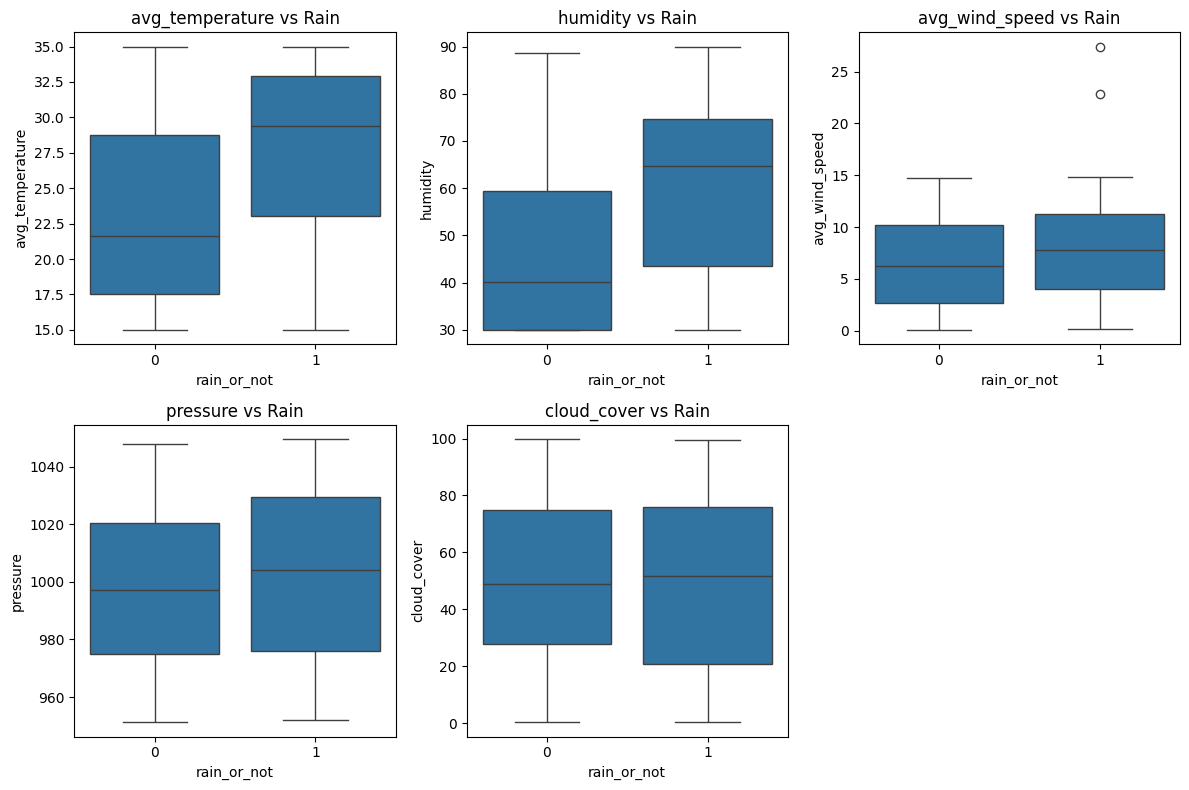

In [92]:
features = ["avg_temperature", "humidity", "avg_wind_speed", "pressure","cloud_cover"]
plt.figure(figsize=(12, 8))

for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df["rain_or_not"], y=df[feature])
    plt.title(f"{feature} vs Rain")
    
plt.tight_layout()
plt.show()

In [93]:
df

,avg_temperature,humidity,avg_wind_speed,rain_or_not,cloud_cover,pressure,month,day
0,23.745401,46.140905,7.845981,1,20.851051,992.965681,1,1
1,30.030503,59.876587,5.382457,1,93.059521,1037.273025,1,2
2,28.365224,51.464618,13.158008,1,11.636640,1034.193357,1,3
3,27.550929,53.103799,5.886677,1,81.744971,968.610142,1,4
4,23.639303,57.826186,12.248992,1,38.062329,1030.264331,1,5
...,...,...,...,...,...,...,...,...
306,22.072834,37.756910,4.729355,0,27.307081,954.564875,11,3
307,19.645885,42.190604,8.092369,0,51.807877,964.002410,11,4
308,23.884496,36.205508,11.860847,1,29.872557,977.681431,11,5
309,18.168418,34.785000,4.781288,0,94.067925,1047.153269,11,6


### Rain Probability Over Time

Check seasonal trends in rain occurrences

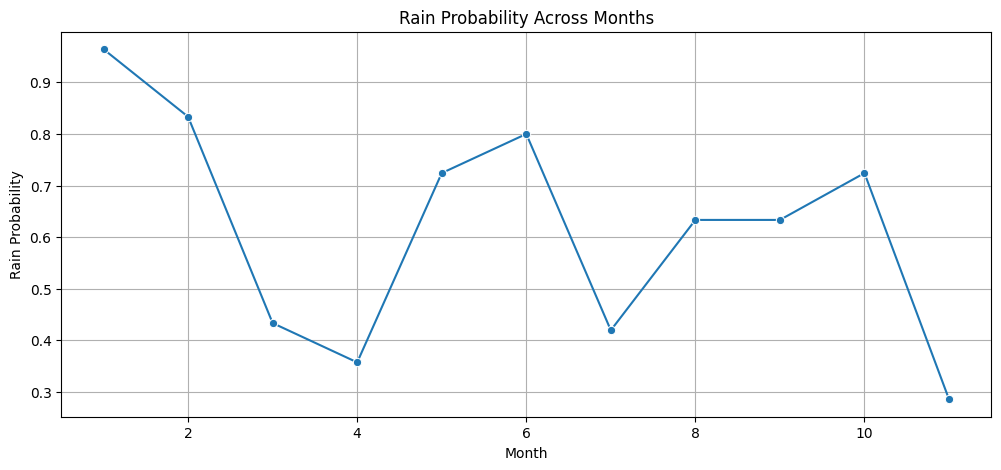

In [94]:
# Group by month and calculate average rain probability
monthly_rain = df.groupby("month")["rain_or_not"].mean()

plt.figure(figsize=(12, 5))
sns.lineplot(x=monthly_rain.index, y=monthly_rain.values, marker="o")
plt.xlabel("Month")
plt.ylabel("Rain Probability")
plt.title("Rain Probability Across Months")
plt.grid()
plt.show()


#### Pairplot (Feature Relationships)
Pairwise relationships help in spotting patterns

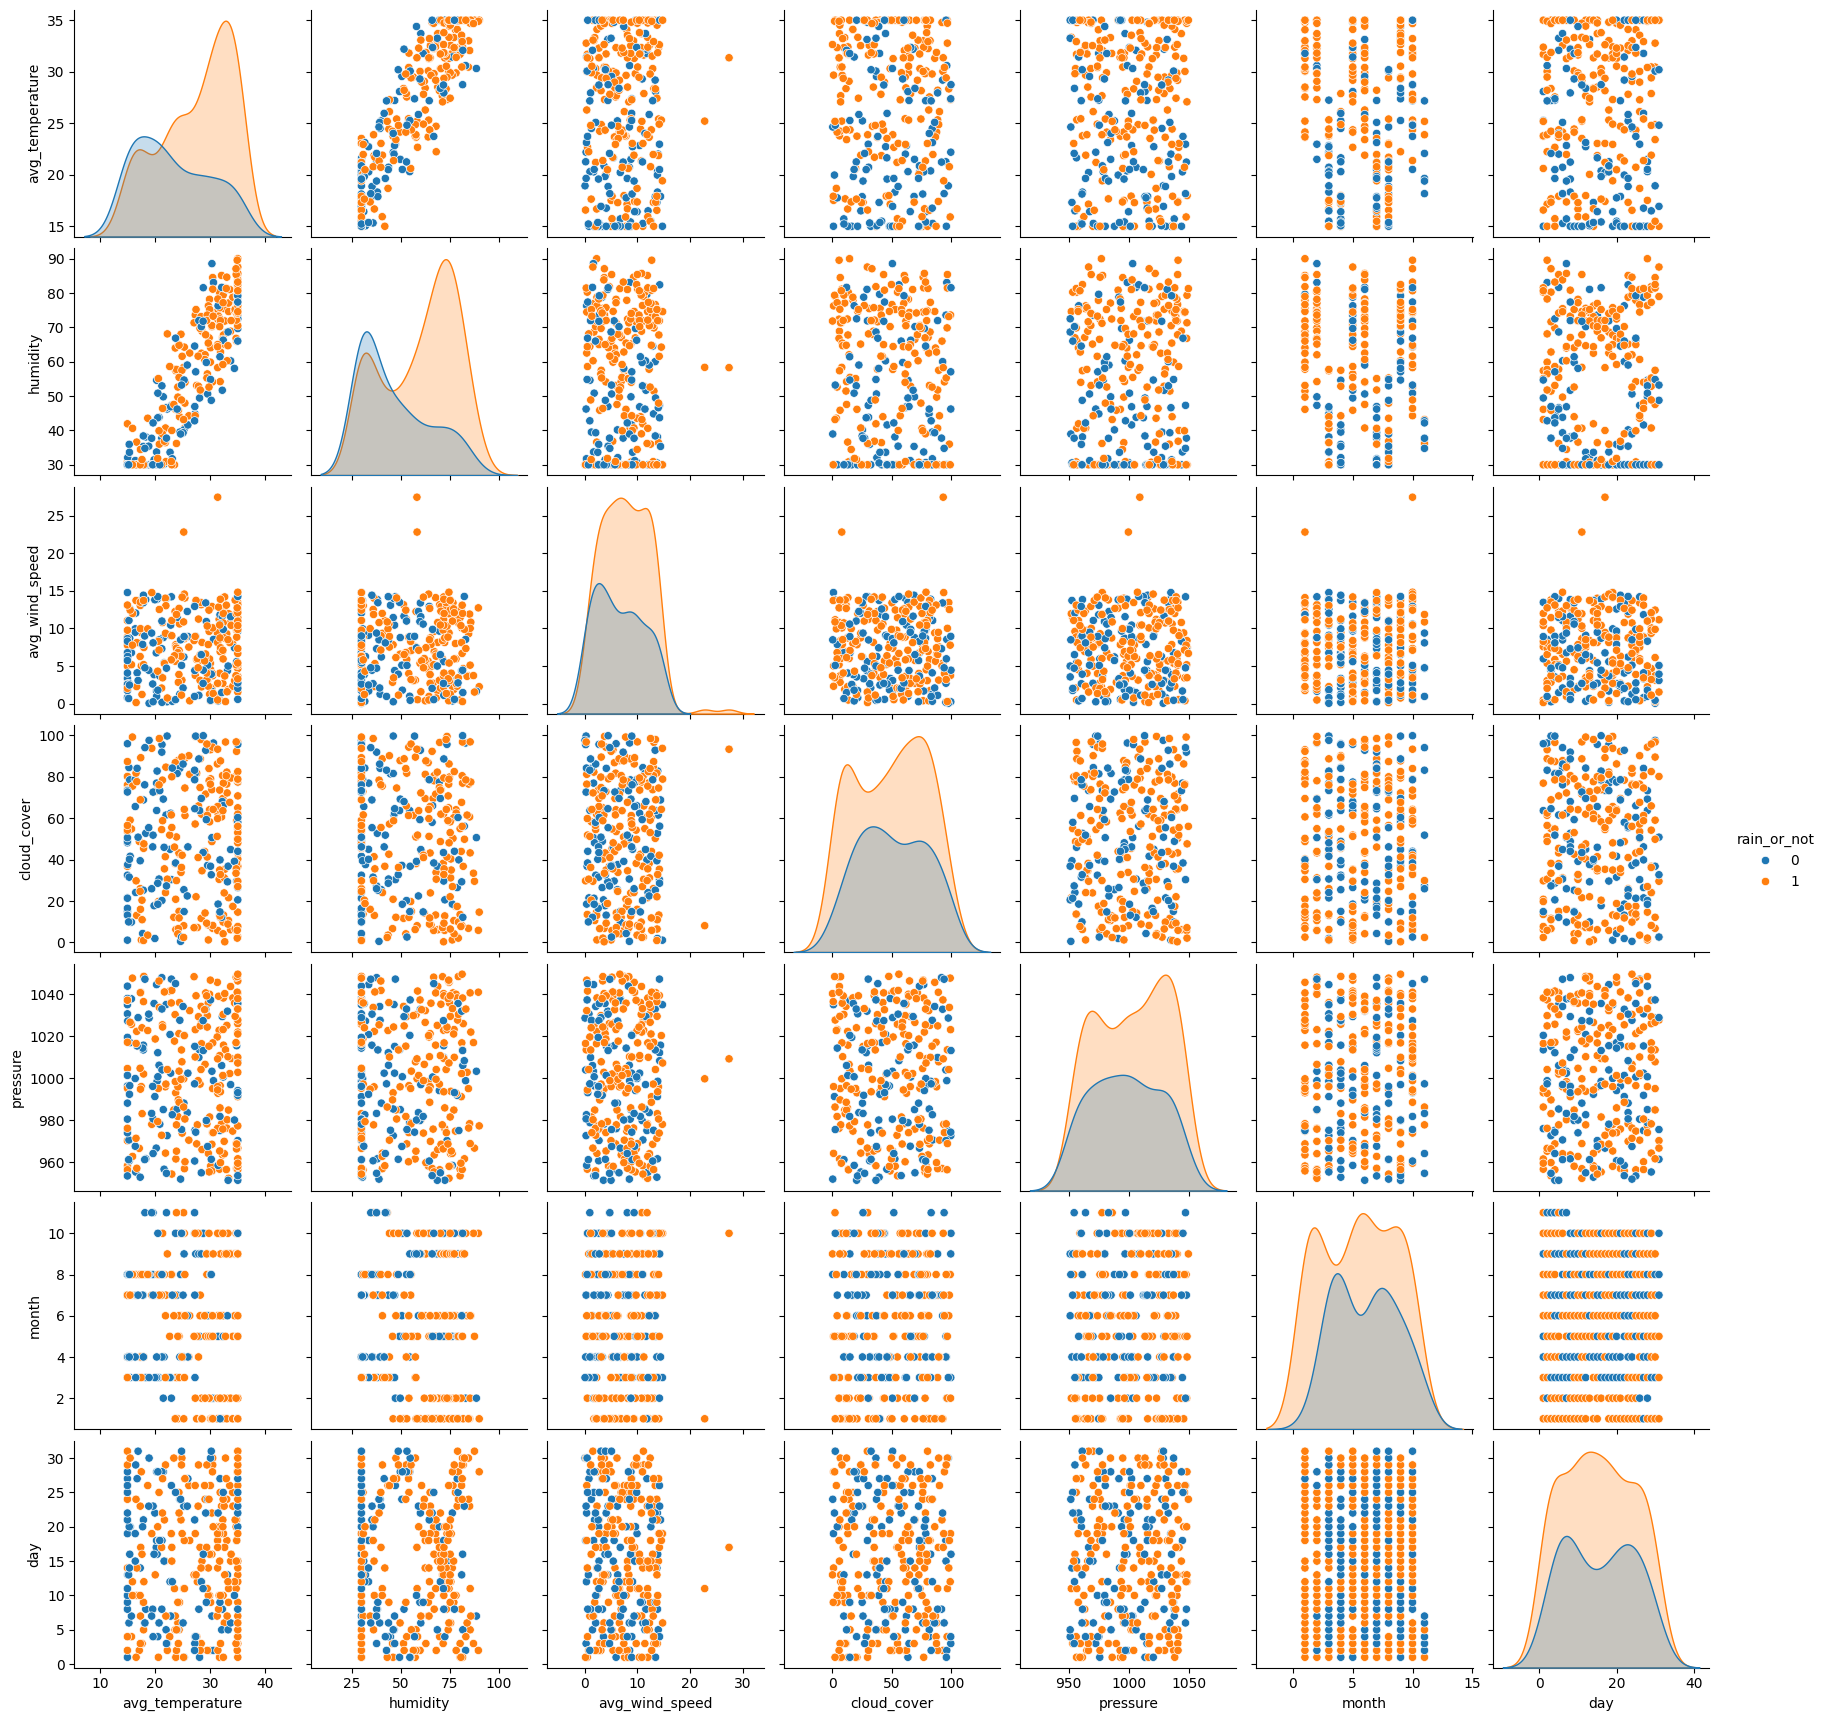

In [95]:
sns.pairplot(df, hue="rain_or_not", diag_kind="kde")
plt.show()

## Model Creation 

In [96]:
X = df.drop(columns=["rain_or_not"])
y = df["rain_or_not"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Random Forest

In [97]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


y_pred_rf = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_rf)

print("Random Forest Performance:\n", classification_report(y_test, y_pred_rf))

Random Forest Performance:
               precision    recall  f1-score   support

           0       0.62      0.41      0.49        32
           1       0.72      0.86      0.78        57

    accuracy                           0.70        89
   macro avg       0.67      0.63      0.64        89
weighted avg       0.68      0.70      0.68        89



### Logistic Regression

In [98]:
log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)

y_pred_log = log_model.predict(X_test_scaled)

print("Logistic Regression Performance:\n", classification_report(y_test, y_pred_log))

Logistic Regression Performance:
               precision    recall  f1-score   support

           0       0.59      0.53      0.56        32
           1       0.75      0.79      0.77        57

    accuracy                           0.70        89
   macro avg       0.67      0.66      0.66        89
weighted avg       0.69      0.70      0.69        89



### Decision Trees

In [99]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

print("Decision Tree Performance:\n", classification_report(y_test, y_pred_dt))

Decision Tree Performance:
               precision    recall  f1-score   support

           0       0.35      0.28      0.31        32
           1       0.63      0.70      0.67        57

    accuracy                           0.55        89
   macro avg       0.49      0.49      0.49        89
weighted avg       0.53      0.55      0.54        89



### XGBoost

In [100]:
xgb_model = XGBClassifier(n_estimators=100, random_state=42)
xgb_model.fit(X_train_scaled, y_train)

y_pred_xgb = xgb_model.predict(X_test_scaled)

print("Gradient Boosting (XGBoost) Performance:\n", classification_report(y_test, y_pred_xgb))

Gradient Boosting (XGBoost) Performance:
               precision    recall  f1-score   support

           0       0.44      0.22      0.29        32
           1       0.66      0.84      0.74        57

    accuracy                           0.62        89
   macro avg       0.55      0.53      0.52        89
weighted avg       0.58      0.62      0.58        89



## Feature Importance (Using Random Forest)

Check which features are most important for rain prediction

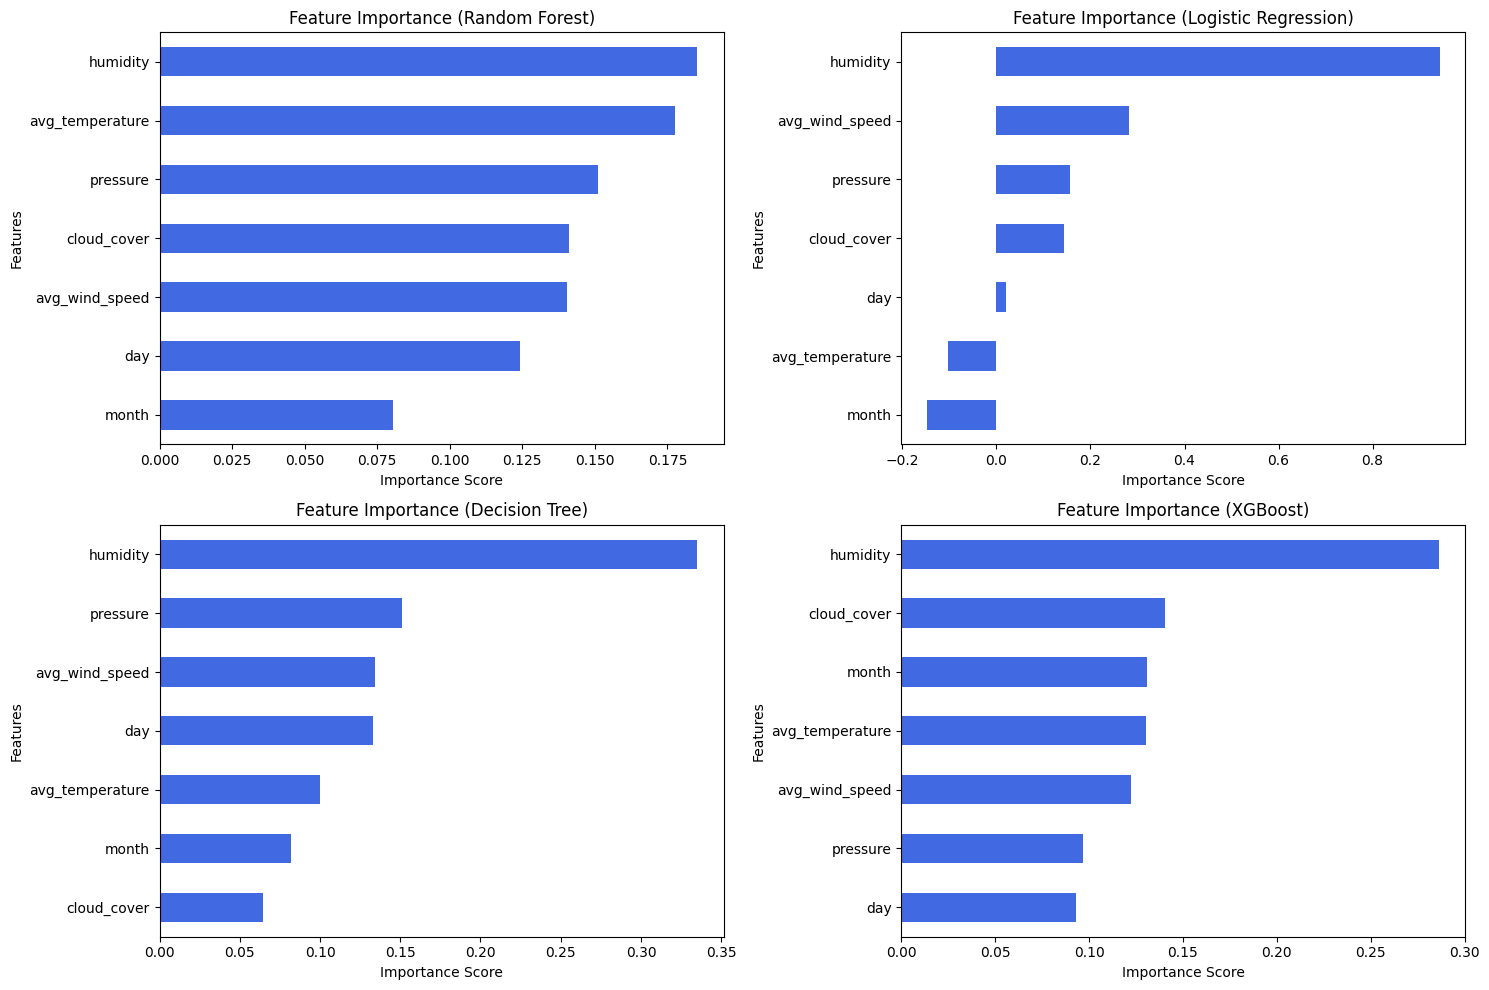

In [101]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

feature_importance_rf = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importance_rf.sort_values().plot(kind="barh", ax=axes[0, 0], color="royalblue")
axes[0, 0].set_title("Feature Importance (Random Forest)")
axes[0, 0].set_xlabel("Importance Score")
axes[0, 0].set_ylabel("Features")

feature_importance_log = pd.Series(log_model.coef_[0], index=X.columns)
feature_importance_log.sort_values().plot(kind="barh", ax=axes[0, 1], color="royalblue")
axes[0, 1].set_title("Feature Importance (Logistic Regression)")
axes[0, 1].set_xlabel("Importance Score")
axes[0, 1].set_ylabel("Features")

feature_importance_dt = pd.Series(dt_model.feature_importances_, index=X.columns)
feature_importance_dt.sort_values().plot(kind="barh", ax=axes[1, 0], color="royalblue")
axes[1, 0].set_title("Feature Importance (Decision Tree)")
axes[1, 0].set_xlabel("Importance Score")
axes[1, 0].set_ylabel("Features")

feature_importance_xgb = pd.Series(xgb_model.feature_importances_, index=X.columns)
feature_importance_xgb.sort_values().plot(kind="barh", ax=axes[1, 1], color="royalblue")
axes[1, 1].set_title("Feature Importance (XGBoost)")
axes[1, 1].set_xlabel("Importance Score")
axes[1, 1].set_ylabel("Features")

plt.tight_layout()
plt.show()

In [102]:
from sklearn.metrics import accuracy_score

models = {
    "Logistic Regression": accuracy_score(y_test, y_pred_log),
    "Decision Tree": accuracy_score(y_test, y_pred_dt),
    "Random Forest": accuracy_score(y_test, y_pred_rf),
    "XGBoost": accuracy_score(y_test, y_pred_xgb)
}

for model, acc in models.items():
    print(f"{model}: {acc:.4f}")


Logistic Regression: 0.6966
Decision Tree: 0.5506
Random Forest: 0.6966
XGBoost: 0.6180
